In [1]:
import os
import csv
from matplotlib import pyplot as plt

In [2]:
!rm -rf ../pre/zipf/*

In [3]:
directory = "../pre/zipf"

os.makedirs(directory, exist_ok=True)

In [4]:
filepath = "../pre/global/counts.csv"

data = []
with open(filepath) as f:
    reader = csv.reader(f)
    
    # Skip the first line
    next(reader)

    data = [[row[0], int(row[1])] for row in reader if row[0] != '']

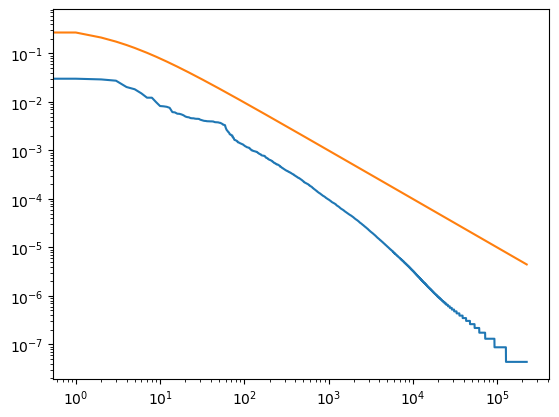

<Figure size 640x480 with 0 Axes>

In [5]:
alpha = 1
beta = 2.7

word_count = sum([x[1] for x in data])

# Plots the frequency
plt.loglog([x[1] / word_count for x in data])
# Plots an ideal curve 
plt.plot([x for x in range(0, len(data))], [1/pow(x + beta, alpha) for x in range(0, len(data))])
plt.show()
plt.savefig(f"{directory}/zipf_log.png")

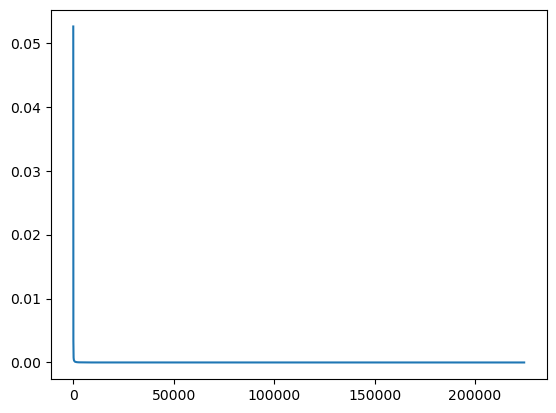

In [6]:
plt.plot([x[1] / word_count for x in data])
plt.show()

In [ ]:
def luhn_cut(data, lower, upper):
    lower_cut = len(data) * lower
    upper_cut = len(data) * upper

    return data[int(lower_cut):int(upper_cut)]

def luhn_cut_explore(data, lower, upper, save=False):
    data_cut = luhn_cut(data, lower, upper)

    word_sum = sum([x[1] for x in data_cut])
    frequency = word_sum / sum([x[1] for x in data])
    word_percentage = len(data_cut) / len(data)

    print(f"Word percentage: {(word_percentage * 100):.2f}%")
    print(f"Frequency: {(frequency * 100):.2f}%")

    plt.loglog([x[1] / word_sum for x in data_cut])
    plt.title(f"Lower: {lower}, Upper: {upper}, Word percentage: {(word_percentage * 100):.2f}%, Frequency: {(frequency * 100):.2f}%")
    plt.show()

    if save:
        plt.savefig(f"{directory}/zipf_log_{lower}_{upper}.png")

    plt.plot([x[1] / word_sum for x in data_cut])
    plt.title(f"Lower: {lower}, Upper: {upper}, Word percentage: {(word_percentage * 100):.2f}%, Frequency: {(frequency * 100):.2f}%")
    plt.show()

    if save:
        plt.savefig(f"{directory}/zipf_linear_{lower}_{upper}.png")


## Balanced cuts

### 1%

Word percentage: 98.00%
Frequency: 12.72%


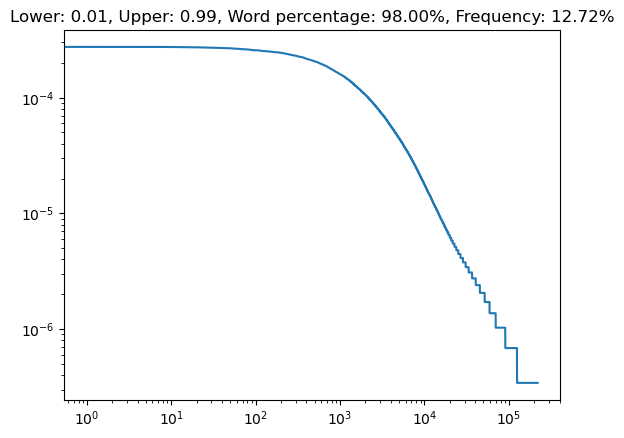

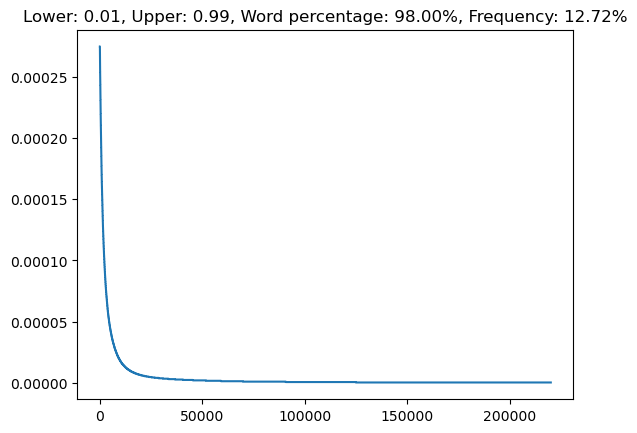

<Figure size 640x480 with 0 Axes>

In [8]:
luhn_cut_explore(data, 0.01, 0.99)

### 5%

Word percentage: 90.00%
Frequency: 4.20%


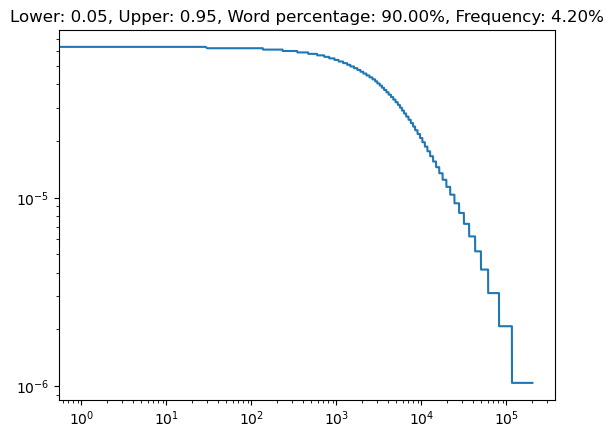

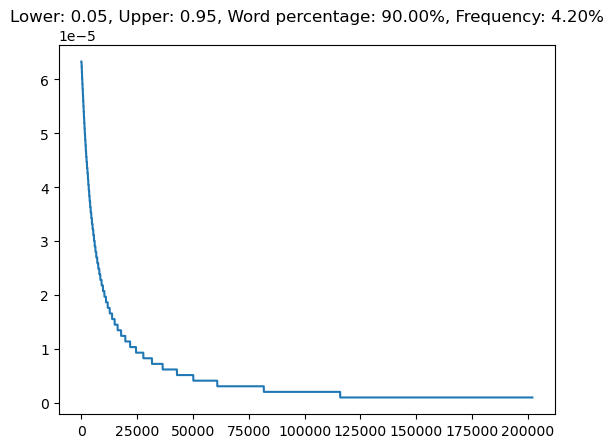

<Figure size 640x480 with 0 Axes>

In [9]:
luhn_cut_explore(data, 0.05, 0.95)

### 10%

Word percentage: 80.00%
Frequency: 2.56%


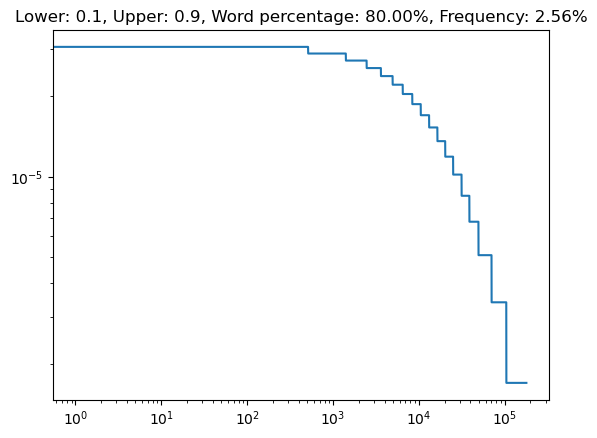

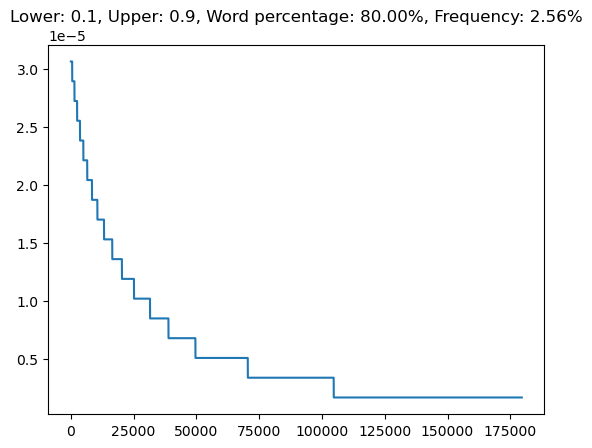

<Figure size 640x480 with 0 Axes>

In [10]:
luhn_cut_explore(data, 0.1, 0.9)

### 15%

Word percentage: 70.00%
Frequency: 1.86%


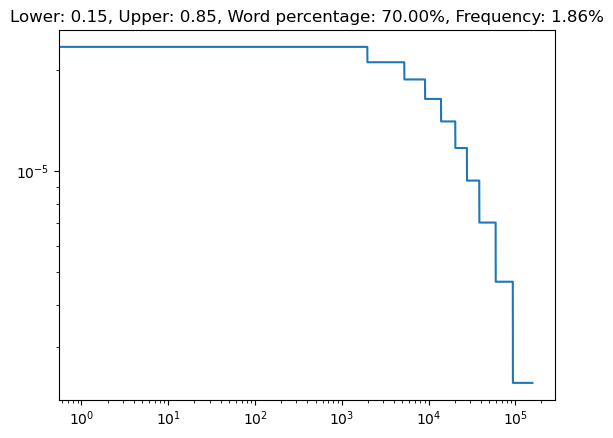

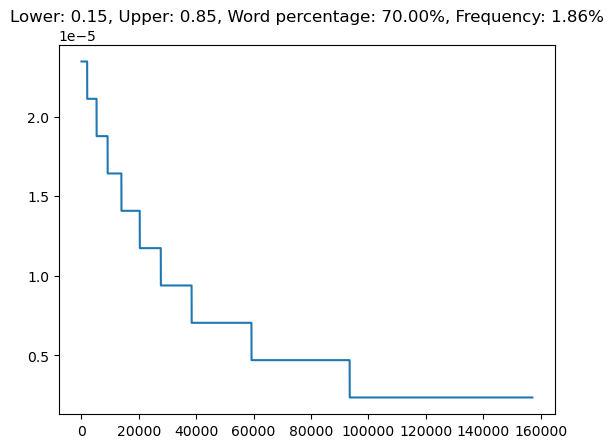

<Figure size 640x480 with 0 Axes>

In [11]:
luhn_cut_explore(data, 0.15, 0.85)

### 20%

Word percentage: 60.00%
Frequency: 1.40%


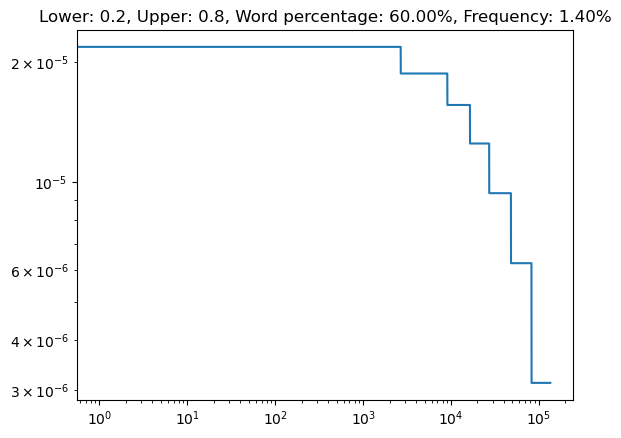

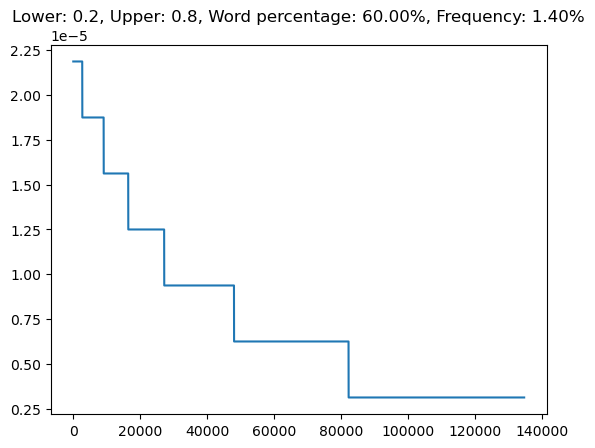

<Figure size 640x480 with 0 Axes>

In [12]:
luhn_cut_explore(data, 0.2, 0.8)

### 25%

Word percentage: 50.00%
Frequency: 1.05%


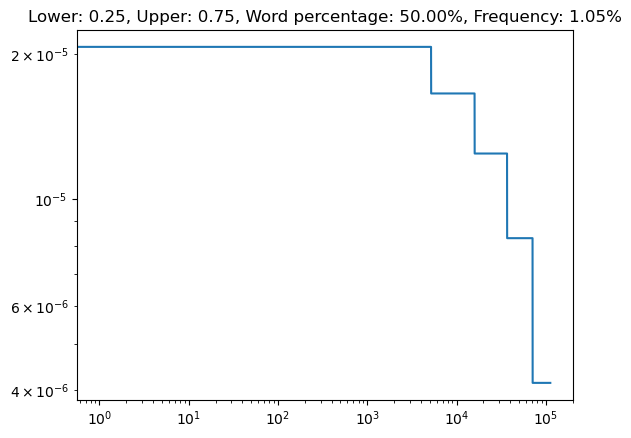

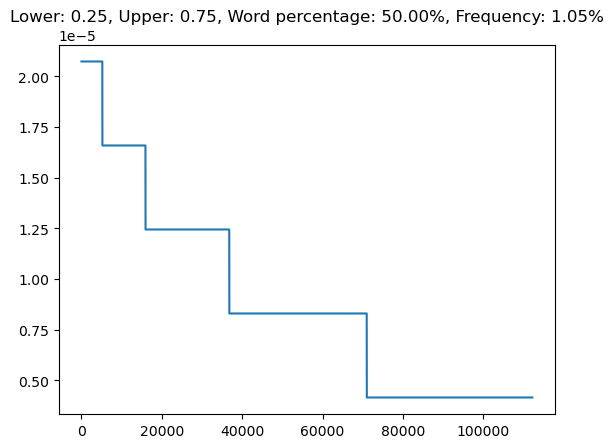

<Figure size 640x480 with 0 Axes>

In [13]:
luhn_cut_explore(data, 0.25, 0.75)

## Unbalenced cuts

### 1%-0%

Word percentage: 99.00%
Frequency: 12.73%


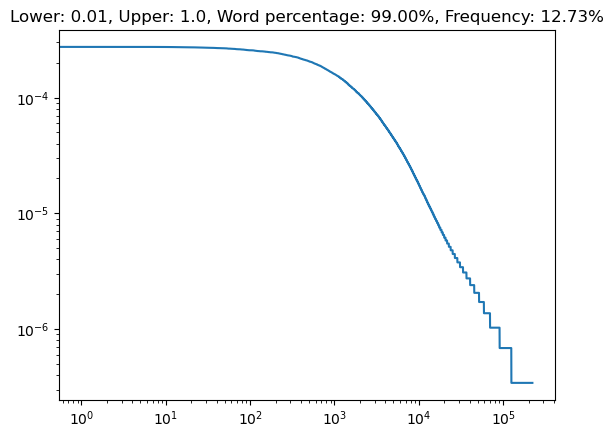

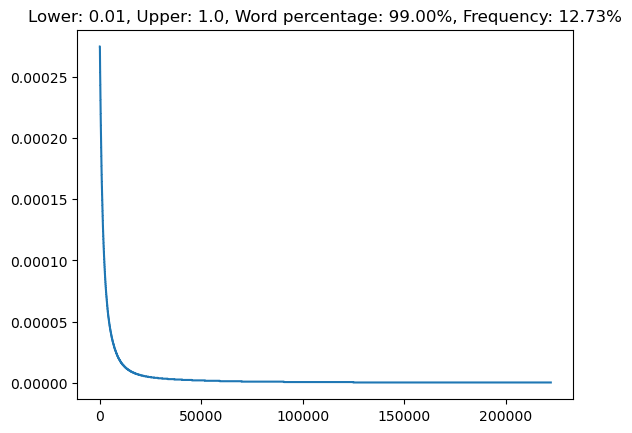

<Figure size 640x480 with 0 Axes>

In [14]:
luhn_cut_explore(data, 0.01, 1.0)

### 0%-1%

Word percentage: 99.00%
Frequency: 99.99%


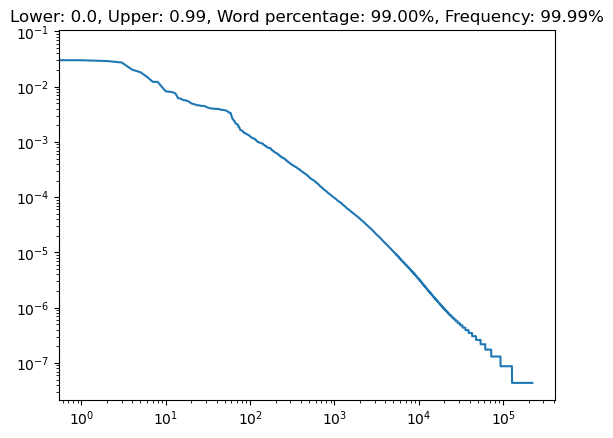

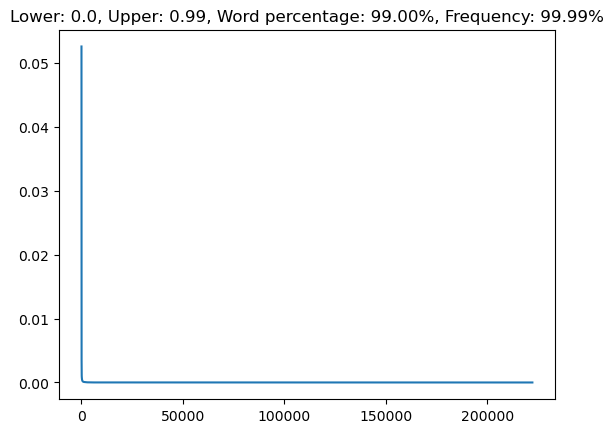

<Figure size 640x480 with 0 Axes>

In [15]:
luhn_cut_explore(data, 0.0, 0.99)

### 1%-5%

Word percentage: 94.00%
Frequency: 12.68%


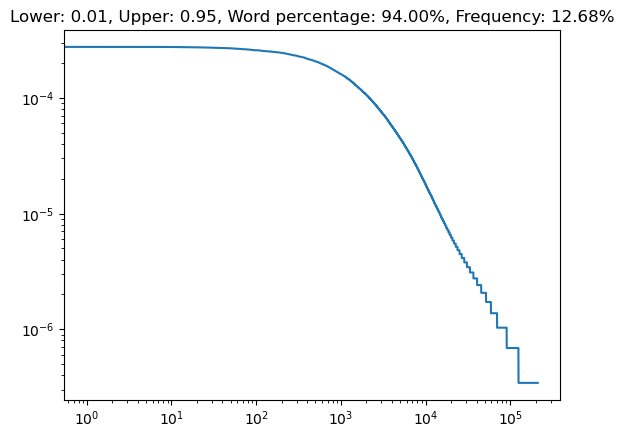

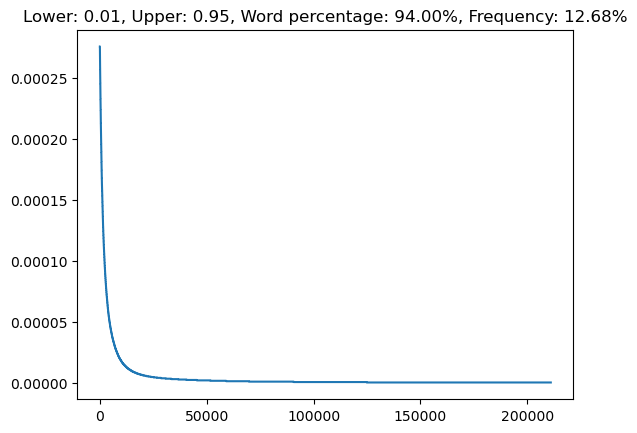

<Figure size 640x480 with 0 Axes>

In [16]:
luhn_cut_explore(data, 0.01, 0.95)

### 5%-1%

Word percentage: 94.00%
Frequency: 4.24%


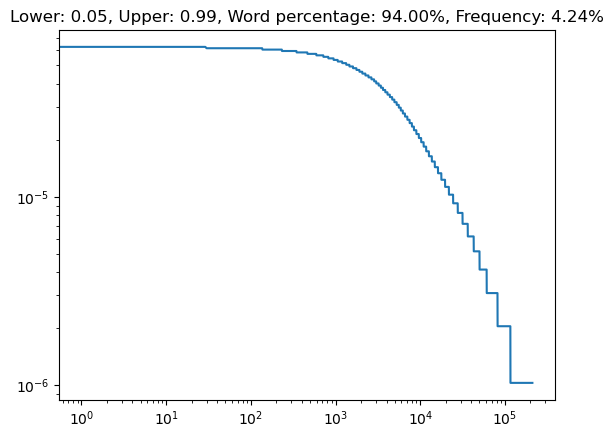

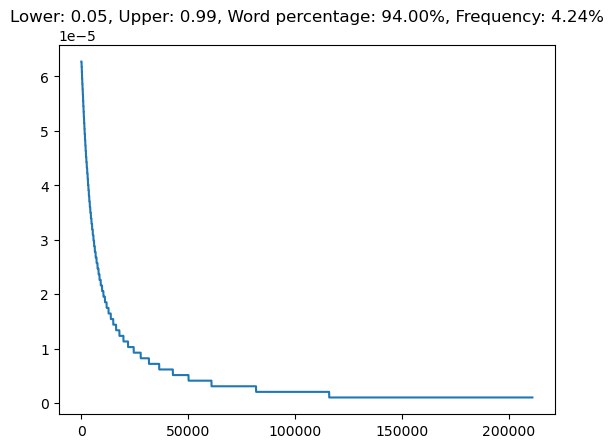

<Figure size 640x480 with 0 Axes>

In [17]:
luhn_cut_explore(data, 0.05, 0.99)

### 5%-10%

Word percentage: 85.00%
Frequency: 4.15%


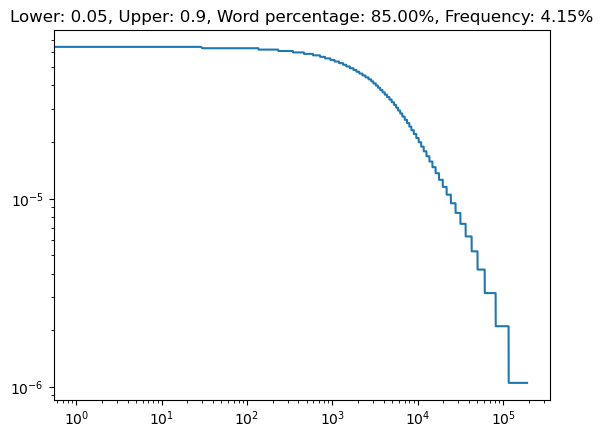

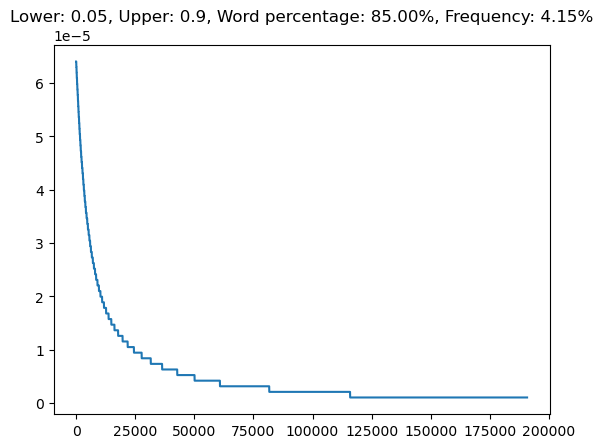

<Figure size 640x480 with 0 Axes>

In [18]:
luhn_cut_explore(data, 0.05, 0.9)

### 10%-5%

Word percentage: 85.00%
Frequency: 2.61%


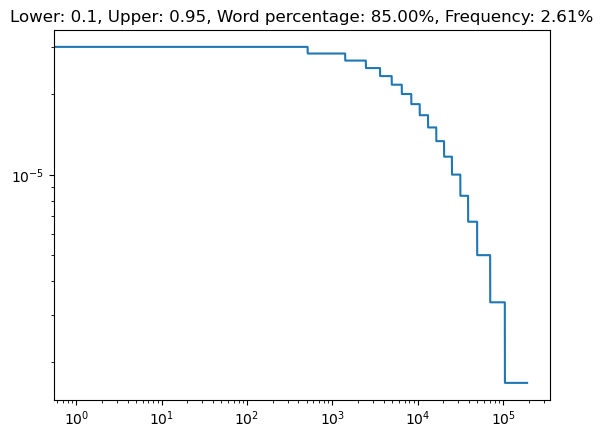

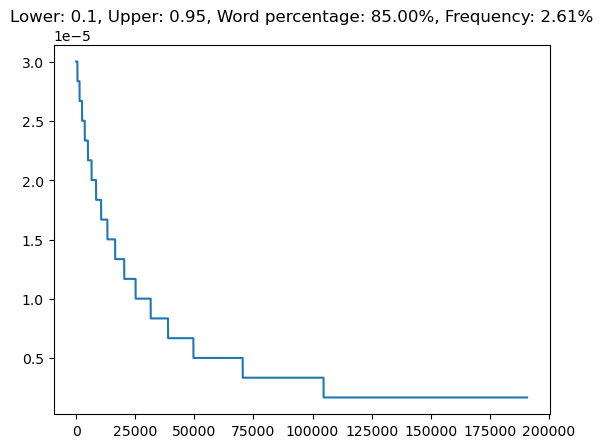

<Figure size 640x480 with 0 Axes>

In [19]:
luhn_cut_explore(data, 0.1, 0.95)

### 10%-20%

Word percentage: 70.00%
Frequency: 2.47%


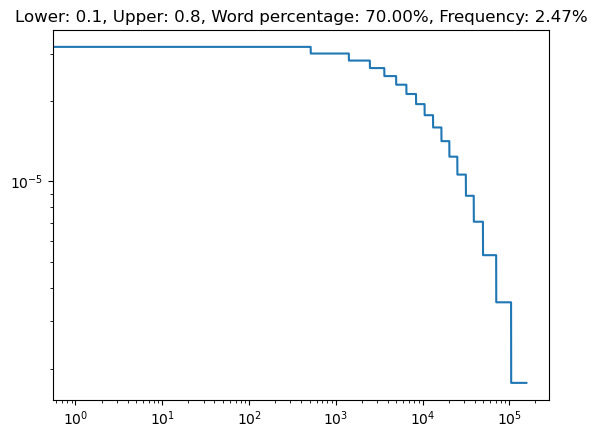

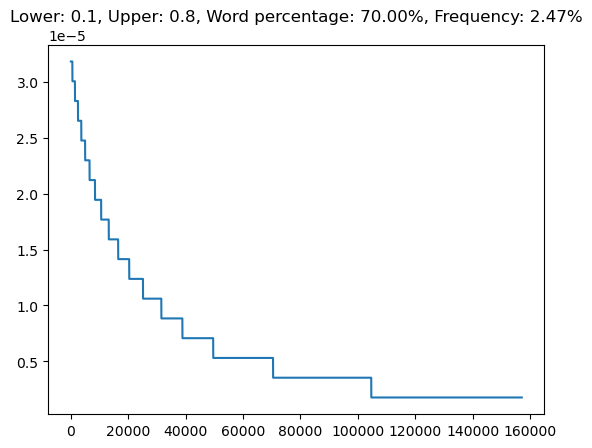

<Figure size 640x480 with 0 Axes>

In [20]:
luhn_cut_explore(data, 0.1, 0.8)

## Extreme cuts

### 1%-30%

Word percentage: 69.00%
Frequency: 12.44%


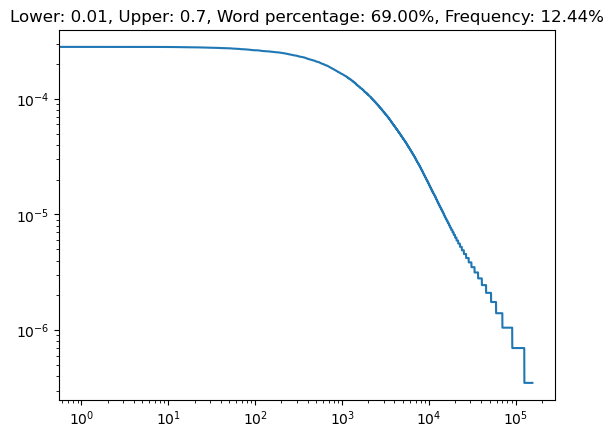

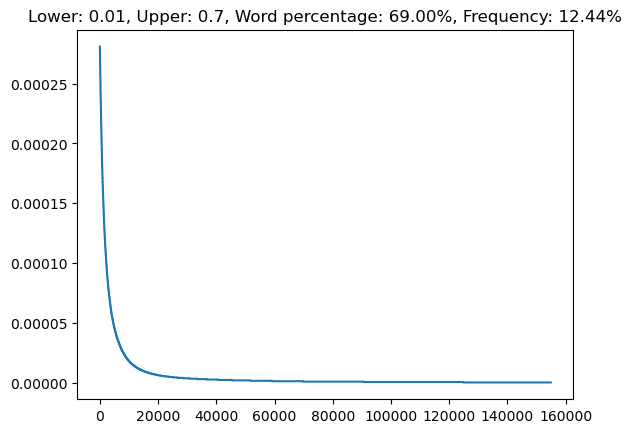

<Figure size 640x480 with 0 Axes>

In [21]:
luhn_cut_explore(data, 0.01, 0.7)

### 5%-30%

Word percentage: 65.00%
Frequency: 3.96%


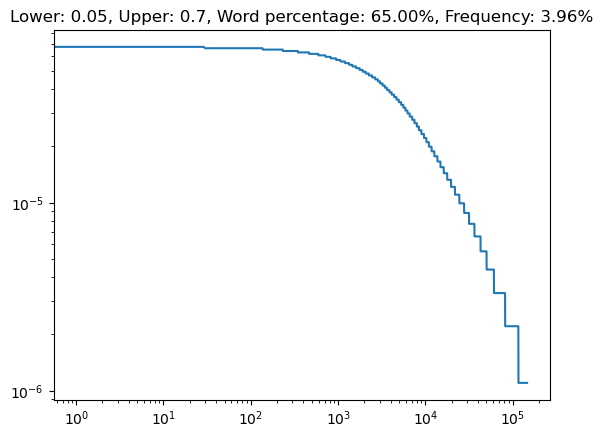

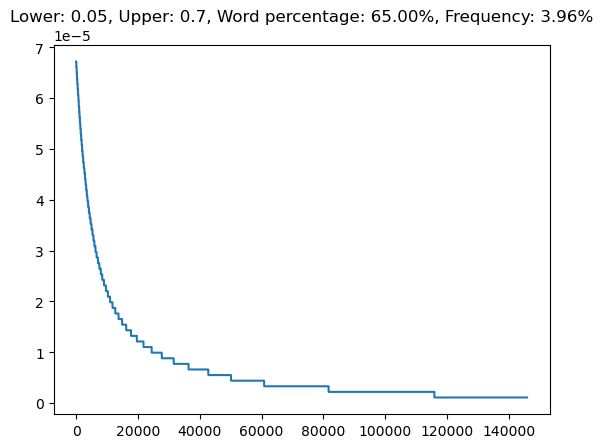

<Figure size 640x480 with 0 Axes>

In [22]:
luhn_cut_explore(data, 0.05, 0.7)

### 10%-30%

Word percentage: 60.00%
Frequency: 2.37%


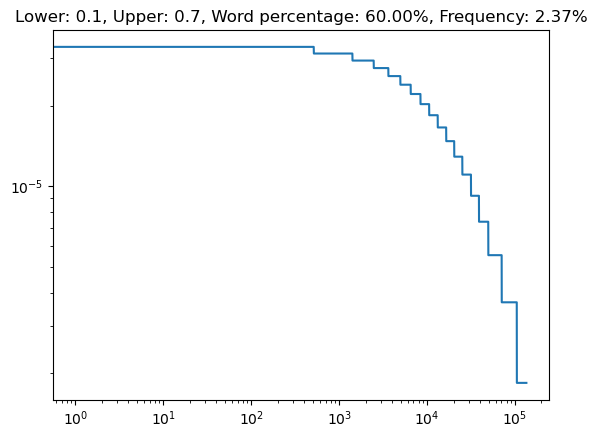

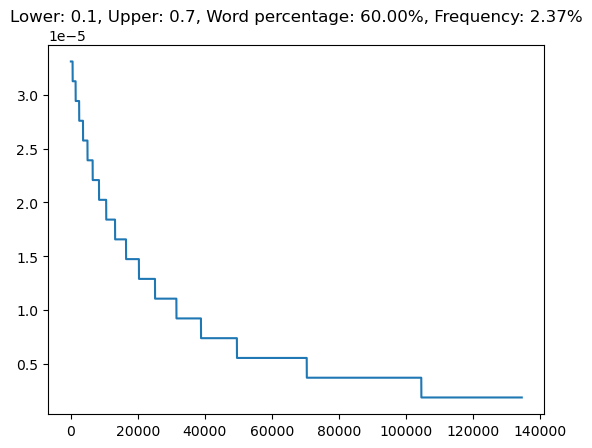

<Figure size 640x480 with 0 Axes>

In [23]:
luhn_cut_explore(data, 0.1, 0.7)

### 1%-40%

Word percentage: 59.00%
Frequency: 12.34%


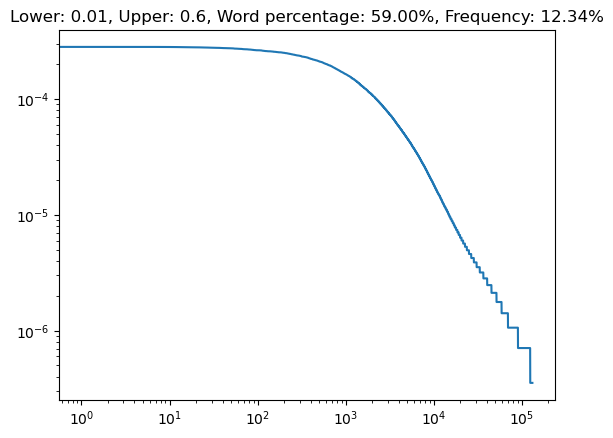

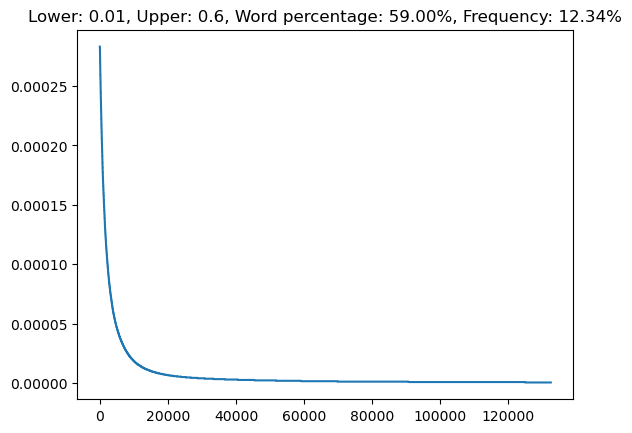

<Figure size 640x480 with 0 Axes>

In [24]:
luhn_cut_explore(data, 0.01, 0.6)

### 5%-40%

Word percentage: 55.00%
Frequency: 3.86%


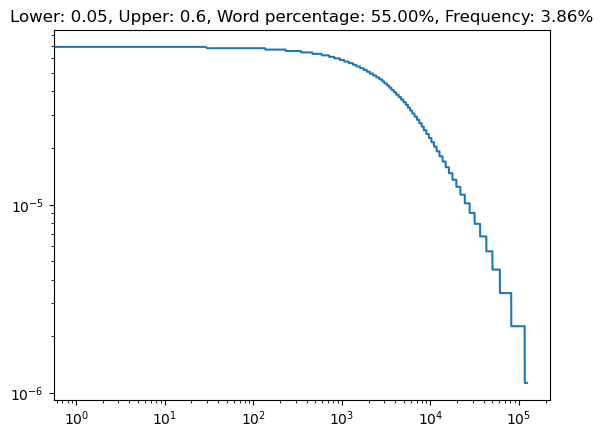

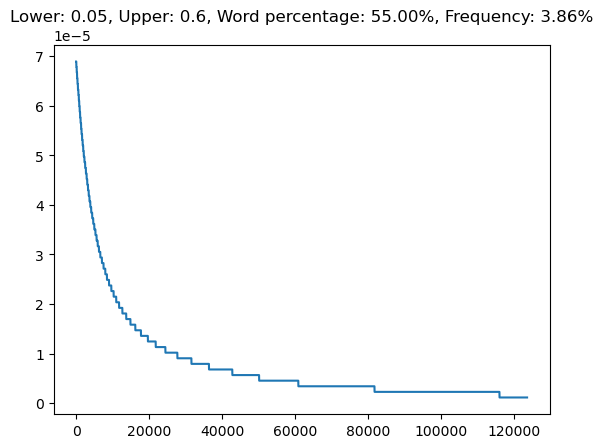

<Figure size 640x480 with 0 Axes>

In [25]:
luhn_cut_explore(data, 0.05, 0.6)

### 10%-40%

Word percentage: 50.00%
Frequency: 2.27%


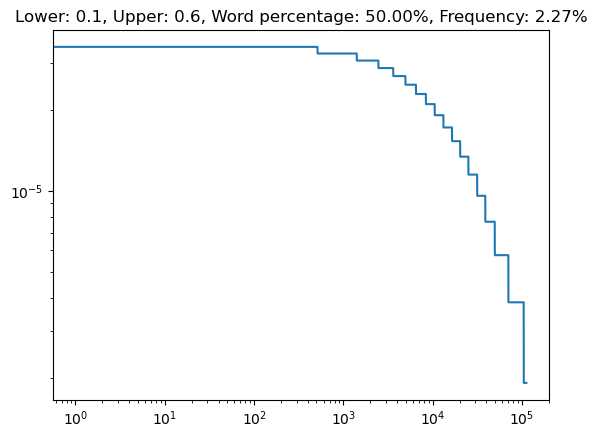

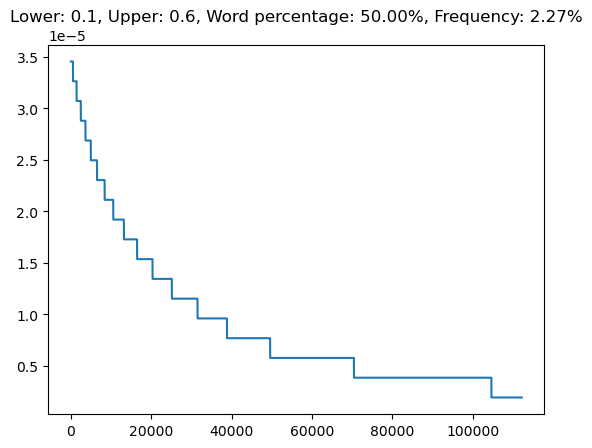

<Figure size 640x480 with 0 Axes>

In [26]:
luhn_cut_explore(data, 0.1, 0.6)

### 1%-50%

Word percentage: 49.00%
Frequency: 12.18%


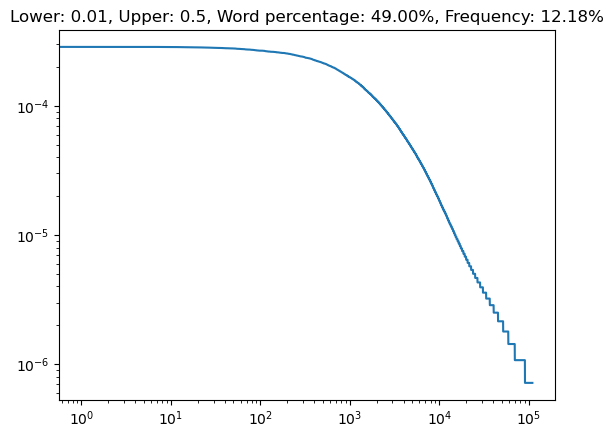

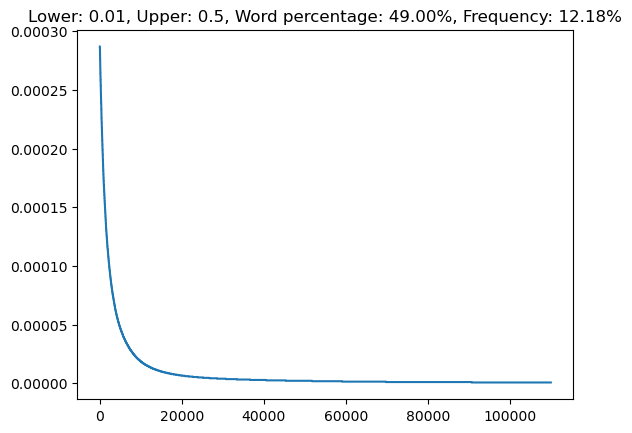

<Figure size 640x480 with 0 Axes>

In [27]:
luhn_cut_explore(data, 0.01, 0.5)

### 5%-50%

Word percentage: 45.00%
Frequency: 3.70%


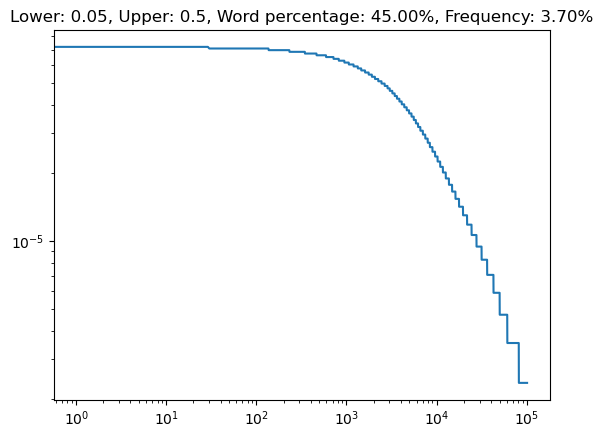

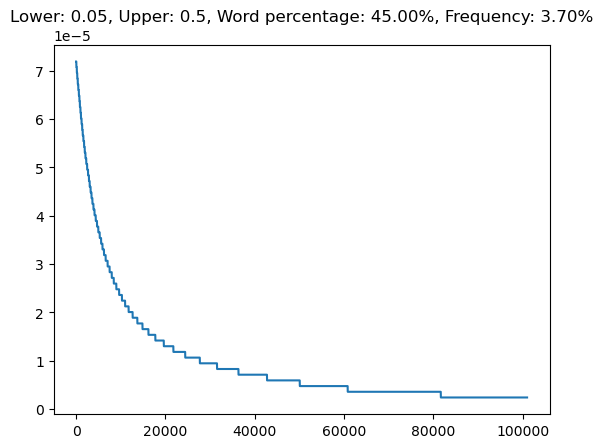

<Figure size 640x480 with 0 Axes>

In [28]:
luhn_cut_explore(data, 0.05, 0.5)

### 10%-50%

Word percentage: 40.00%
Frequency: 2.11%


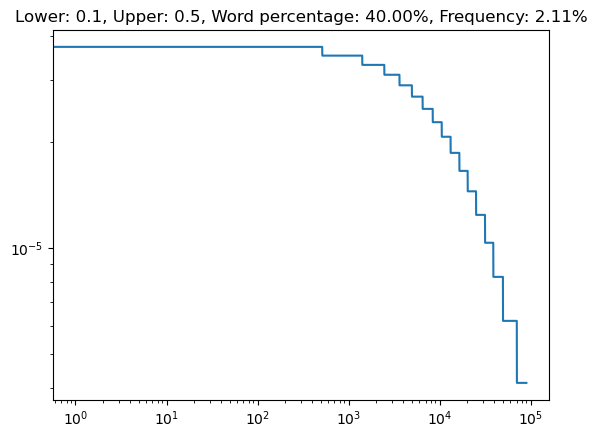

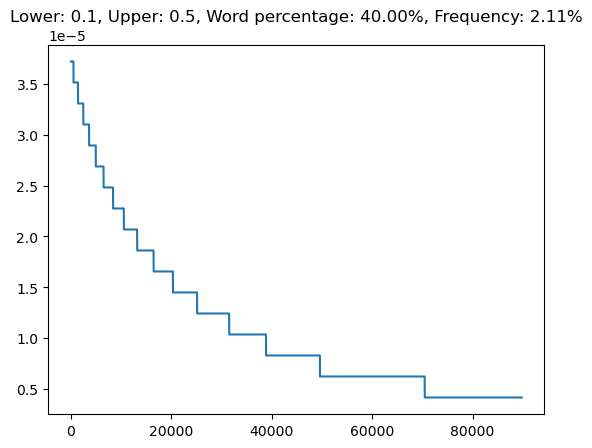

<Figure size 640x480 with 0 Axes>

In [29]:
luhn_cut_explore(data, 0.1, 0.5)

## Apply cut

In [30]:
import re

In [34]:
def validate_word(word: str, frequency: int):
    word = re.sub(r'[^\w0-9]+', '', word, flags=re.UNICODE)

    if len(word) == 0 or word.isnumeric() or frequency < 3:
        return False
    else:
        return True
    
def cut_data(data, lower, upper):
    data_cut = luhn_cut(data, lower, upper)
    keywords = [x[0] for x in data_cut if validate_word(x[0], x[1])]
    stopwords = set([x[0] for x in data]) - set(keywords)

    print("Stopwords:", len(stopwords))
    print("Keywords", len(keywords))

    with open(f"{directory}/keywords-{lower:.2f}-{upper:.2f}.csv", "w") as f:
        for word in keywords:
            f.write(f"{word}\n")

    with open(f"{directory}/stopwords-{lower:.2f}-{upper:.2f}.csv", "w") as f:
        for word in stopwords:
            f.write(f"{word}\n")

In [35]:
cut_data(data, 0.01, 0.5)

Stopwords: 166288
Keywords 58177
